In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

# Load training data

In [4]:
train_path = "./train/train"
# train_path = "./val_in/val_in"
training_samples = []
datalen = 1 #1000
# The glob module finds all the pathnames matching a specified pattern
train_pkl_lst = glob(os.path.join(train_path, '*'))
for i in tqdm(range(datalen)):
    with open(train_pkl_lst[i], 'rb') as f:
        training_samples.append(pickle.load(f))

100%|██████████| 1/1 [00:00<00:00, 1020.76it/s]


In [5]:
with open(train_pkl_lst[0], 'rb') as f:
    training_sample = pickle.load(f)

In [6]:
training_samples = np.array(training_samples)
print(training_samples.shape)

(1,)


In [7]:
training_sample.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])

In [8]:
training_sample['city']

'PIT'

In [9]:
training_sample['lane'].shape

(180, 2)

In [10]:
training_sample['lane_norm'].shape

(180, 2)

In [11]:
training_sample['scene_idx']

39015

In [12]:
training_sample['agent_id']

'00000000-0000-0000-0000-000000127732'

In [13]:
training_sample['car_mask'].shape

(60, 1)

In [14]:
training_sample['p_in'].shape

(60, 19, 2)

In [15]:
training_sample['v_in'].shape

(60, 19, 2)

In [16]:
training_sample['p_out'].shape

(60, 30, 2)

In [17]:
training_sample['v_out'].shape

(60, 30, 2)

In [18]:
training_sample['track_id']

array(['00000000-0000-0000-0000-000000000000',
       '00000000-0000-0000-0000-000000127732',
       '00000000-0000-0000-0000-000000128030',
       '00000000-0000-0000-0000-000000128060',
       '00000000-0000-0000-0000-000000128091',
       '00000000-0000-0000-0000-000000128094',
       '00000000-0000-0000-0000-000000128206',
       '00000000-0000-0000-0000-000000128215',
       '00000000-0000-0000-0000-000000128219',
       '00000000-0000-0000-0000-000000128221',
       '00000000-0000-0000-0000-000000128260',
       '00000000-0000-0000-0000-000000128291',
       '00000000-0000-0000-0000-000000128299'], dtype=object)

In [6]:
cities_arr = []
for i in range(len(training_samples)):
    cities_arr.append(training_samples[i]['city'])
cities_df = pd.DataFrame(cities_arr)
print(cities_df[0].unique())

['PIT' 'MIA']


In [192]:
# city can be either 'PIT' or 'MIA'
# replace with binary representation
# PIT is 0, MIA is 1
for i in range(training_samples.shape[0]):
    if training_samples[i]['city'] == 'PIT':
        training_samples[i]['city'] = 0
    elif training_samples[i]['city'] == 'MIA':
        training_samples[i]['city'] = 1

In [193]:
cities_arr = []
for i in range(training_samples.shape[0]):
    cities_arr.append(training_samples[i]['city'])
cities_df = pd.DataFrame(cities_arr)
print(cities_df[0].unique())

[1 0]


In [194]:
# scene index gives us no information so it can be dropped
scene_idx_arr = []
for i in range(training_samples.shape[0]):
    scene_idx_arr.append(training_samples[i]['scene_idx'])
scene_idx_df = pd.DataFrame(scene_idx_arr)
print(scene_idx_df[0].unique().shape)

(205942,)


In [195]:
# drop scene_idx
for i in range(training_samples.shape[0]):
    del training_samples[i]['scene_idx']

In [196]:
print(training_samples[0]['scene_idx'])

KeyError: 'scene_idx'

In [197]:
print(training_samples[100]['agent_id'])

00000000-0000-0000-0000-000000097011


In [198]:
# get unique values of Agent ID
agent_id_arr = []
for i in range(training_samples.shape[0]):
    agent_id_arr.append(training_samples[i]['agent_id'])
agent_id_df = pd.DataFrame(agent_id_arr)
print(agent_id_df[0].unique().shape)
print(agent_id_df[0][0])

(76670,)
00000000-0000-0000-0000-000000010222


In [199]:
# can replace last with only the last 8 values
agent_id_arr = []
for i in range(training_samples.shape[0]):
    training_samples[i]['agent_id'] = training_samples[i]['agent_id'][-8:]
    agent_id_arr.append(training_samples[i]['agent_id'])
agent_id_df = pd.DataFrame(agent_id_arr)
print(agent_id_df[0].unique().shape)
print(agent_id_df[0][0])

(76670,)
00010222


In [200]:
# for some reason the first track ID is always all 0s, lets remove that
track_id_arr = []
for i in range(training_samples.shape[0]):
    training_samples[i]['track_id'] = np.delete(training_samples[i]['track_id'], 0)
    track_id_arr.append(training_samples[i]['track_id'])
track_id_df = pd.DataFrame(track_id_arr)
print(track_id_df[0].unique().shape)

(35225,)


In [201]:
# we only need the last 8 values of track ID since the rest are zeros
track_id_arr = []
for i in range(training_samples.shape[0]):
    for j in range(training_samples[i]['track_id'].shape[0]):
        track_id_arr.append(training_samples[i]['track_id'][j])
track_id_df = pd.DataFrame(track_id_arr)
print(track_id_df[0].unique().shape)
print(track_id_df[0][0])

(141978,)
00000000-0000-0000-0000-000000010045


In [202]:
# lets actually remove them
track_id_arr = []
for i in range(training_samples.shape[0]):
    for j in range(training_samples[i]['track_id'].shape[0]):
        training_samples[i]['track_id'][j] = training_samples[i]['track_id'][j][-8:]
        track_id_arr.append(training_samples[i]['track_id'][j])
track_id_df = pd.DataFrame(track_id_arr)
print(track_id_df[0].unique().shape)
print(track_id_df[0][0])

(141978,)
00010045


In [203]:
# import pickle
# pickle.dump(training_samples, open("training_samples.p", "wb"))
# pickle.dump(training_samples, open("val_samples.p", "wb"))

In [234]:
print(training_samples[0].keys())

dict_keys(['city', 'lane', 'lane_norm', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])


In [205]:
print(training_samples[0]['lane'].shape)

(333, 2)


In [35]:
with open(train_pkl_lst[0], 'rb') as f:
    training_sample = pickle.load(f)

In [39]:
len(training_sample['track_id'])

6

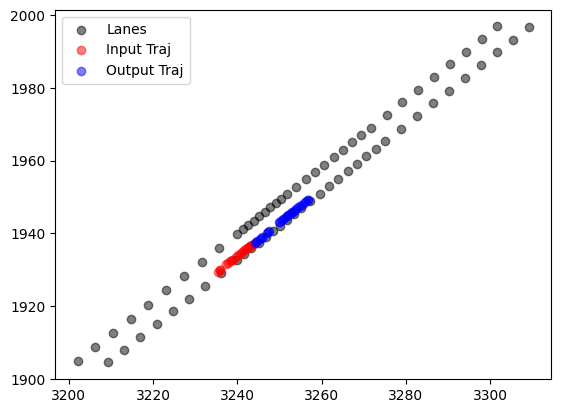

In [44]:
plt.scatter(training_sample['lane'][:,0], training_sample['lane'][:,1], alpha=0.5, label = "Lanes", color = "black")

for i in range(len(training_sample['track_id'])):
    if training_sample['track_id'][i] == training_sample['agent_id']:
        plt.scatter(training_sample['p_in'][i,:,0], training_sample['p_in'][i,:,1], alpha=0.5, label = "Input Traj", color = "red")
        plt.scatter(training_sample['p_out'][i,:,0], training_sample['p_out'][i,:,1], alpha=0.5, label = "Output Traj", color = "blue")

plt.legend()
# plt.xticks([])
# plt.yticks([])
plt.show()

5


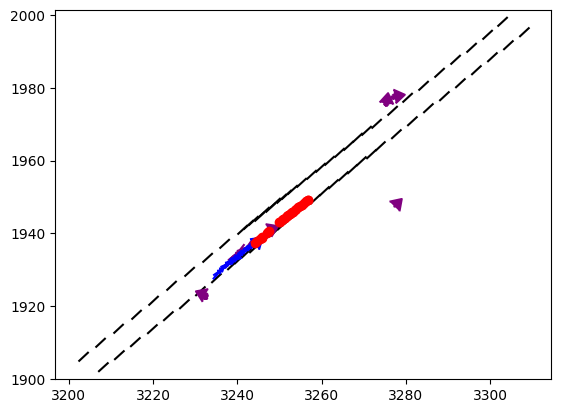

In [84]:
# rasterization attempt
import math

scene_idx = 0

training_sample = training_samples[scene_idx]

for i in range(len(training_sample['track_id'])):
    if training_sample['agent_id'] == training_sample['track_id'][i]:
        agent_idx = i
        break

print(agent_idx)

for i, p in enumerate(training_sample['lane']):
    angle = math.atan2(training_sample['lane_norm'][i,1], training_sample['lane_norm'][i,0])*180/math.pi
    #print((training_samples[scene_idx]['lane_norm'][i], angle))
    t = matplotlib.markers.MarkerStyle(marker=0)
    t._transform = t.get_transform().rotate_deg(angle)
    plt.scatter(training_sample['lane'][i,0], training_sample['lane'][i,1], label="lane", color="black", marker=t, s=100)
    


for i in range(len(training_sample['track_id'])):
    
    # normalize velocity
    norm = np.linalg.norm(training_sample['v_in'][i]) # Confirm if correct since normalizing 19x2 matrix into scalar
    norm_vel = training_sample['v_in'][i] / norm
    #print(training_sample['v_in'][i])
    #print(np.linalg.norm(training_sample['v_in'][i]))
    #print(norm_vel.shape)
    #print(norm_vel)
    
    
    if training_sample['track_id'][i] == training_sample['agent_id']:
        color = 'blue'
    else:
        color = 'purple'
        
    angles = np.degrees(np.arctan2(norm_vel[:, 1], norm_vel[:, 0]))
    
    for j in range(training_sample['p_in'].shape[1]):
        
        t = matplotlib.markers.MarkerStyle(marker='_')
        size = 5 * norm
        
        if j == len(training_sample['p_in'][i,:,0]) - 1:
            t = matplotlib.markers.MarkerStyle(marker=9)
            size = 100
        
        t._transform = t.get_transform().rotate_deg(angles[j])
        plt.scatter(training_sample['p_in'][i,j,0], training_sample['p_in'][i,j,1], label="p_in", color=color, marker=t, s=size)

plt.scatter(training_sample['p_in'][agent_idx,:,0], training_sample['p_in'][agent_idx,:,1], label="p_in_track", color="blue", marker=t, s=10)
plt.scatter(training_sample['p_out'][agent_idx,:,0], training_sample['p_out'][agent_idx,:,1], label="p_out_track", color="red")

    
# for i, p in enumerate(training_samples[scene_idx]['p_in']):
#     if sum(training_samples[scene_idx]['p_out'][i,:,0])!=0 and sum(training_samples[scene_idx]['p_out'][i,:,1])!=0 and sum(training_samples[scene_idx]['p_in'][i,:,0])!=0 and sum(training_samples[scene_idx]['p_in'][i,:,1])!=0:
#         norm_vel = training_samples[scene_idx]['v_in'][i]/np.linalg.norm(training_samples[scene_idx]['v_in'][i])
#         print(norm_vel.shape)
        
#         for j, q in enumerate(training_samples[scene_idx]['p_in'][i,:,0]):
#             color = 'purple'
#             if i==agent_idx:
#                 color = 'blue'
#             norm_vel_j = norm_vel[j]/np.linalg.norm(norm_vel[j])
#             angle = math.atan2(norm_vel[j, 1], norm_vel[j, 0])*180/math.pi
#             print(angle)
#             t = matplotlib.markers.MarkerStyle(marker=0)
#             size = 50
#             if j==len(training_samples[scene_idx]['p_in'][i,:,0])-1:
#                 t = matplotlib.markers.MarkerStyle(marker=9)
#                 size = 100
#             t._transform = t.get_transform().rotate_deg(angle)
#             plt.scatter(training_samples[scene_idx]['p_in'][i,j,0], training_samples[scene_idx]['p_in'][i,j,1], label = "p_in", color = color, marker=t, s=size)
#             # plt.scatter(training_samples[scene_idx]['p_out'][i,:,0], training_samples[scene_idx]['p_out'][i,:,1], label = "p_out", color = color)
            
#         break

plt.show()


In [19]:
training_sample.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])

In [26]:
len(train_pkl_lst)

205942

In [58]:
with open(train_pkl_lst[0], 'rb') as f:
        scene = pickle.load(f)

# input: p_in & v_in; output: p_out
inp_scene = np.dstack([scene['p_in'], scene['v_in']])
out_scene = np.dstack([scene['p_out'], scene['v_out']])


print(inp_scene.shape)
print(out_scene.shape)

min_vecs = np.min(inp_scene, axis = (0,1))
max_vecs = np.max(inp_scene, axis = (0,1))
print(min_vecs)
print(max_vecs)

# Normalization 
for i in range(len(scene['track_id'])):
    
    if scene['track_id'][i] == scene['agent_id']: 
        min_vecs = np.min(inp_scene, axis=(0,1))
        max_vecs = np.max(inp_scene, axis=(0,1))
        print(min_vecs)
        print(max_vecs)
        
#min_vecs = np.min(inp_scene, axis = (0,1))
#max_vecs = np.max(inp_scene, axis = (0,1))



(60, 19, 4)
(60, 30, 4)
[  0.           0.         -25.90448952 -31.57859802]
[2596.77807617 1234.61364746   24.87532806   31.4165802 ]
[  0.           0.         -25.90448952 -31.57859802]
[2596.77807617 1234.61364746   24.87532806   31.4165802 ]


==== SCENE 0 =====


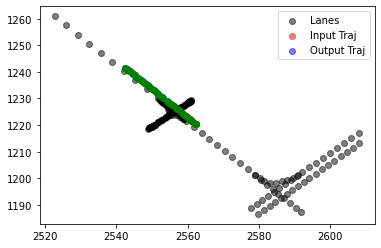

0.11729713506261655
[ 7.45386837  1.30329994  6.32838083  7.07751948  4.3560726   5.97365072
  6.02971044  5.21296238  5.51923391  6.30346298  5.4302017   5.1567645
  7.81135172  4.80391064  6.28191923  6.41629735  7.68764966  5.74099809
  6.00158242  5.75301405  6.39215221  5.24987073  0.         13.325269
  6.32146699  6.06725473  7.87840599  6.59620518  7.73871161  5.62741644
  7.62633816  5.54809798  6.32055833  5.04215863  7.65798439  7.94519311
  6.93143774  6.3109041   6.65006193  5.04597375  5.50279901  6.07185104
  7.50667252  4.35868476  9.48876186  3.24881006  4.96368598  4.14744555
  6.29665668]
mean: 6.09189141815384
var: 3.6210307815464793


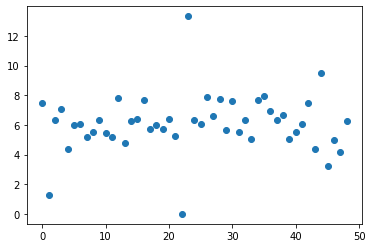

==== SCENE 1 =====


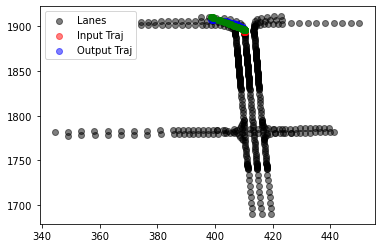

177.6484568483865
[ 1.4609365   1.37561657  0.95713967  2.71387738  2.08607926  1.38934262
  1.86359953  1.38605211  2.55690771  3.27304403  2.47512413  0.
  0.          9.15381536  2.47133694  4.06419437  3.05308379  3.4539661
  3.48985657  4.21209656  3.82304367  4.44226443  3.91479285  5.51757847
  3.89532739  5.62270704  4.90373151 10.96390394  5.64489989  6.36989086
  6.69625453  5.09703775  1.8338379  19.3212905   8.59723606 15.23358133
  9.95284442  9.54819585  8.99020842  6.77861855  3.93976597  5.50790639
  7.01038445  4.01925516  4.68931671 18.45252955  0.98494214  2.02094846
  4.21076996]
mean: 5.090186395560606
var: 17.26246855521856


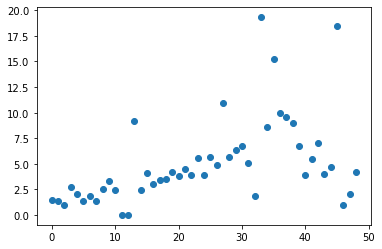

==== SCENE 2 =====


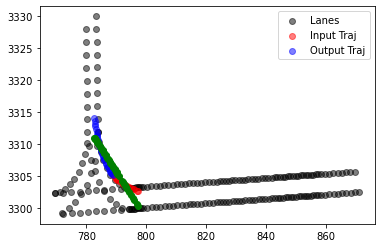

80.90892108412797
[ 3.69928213  3.8036507  10.10903667  3.4050256   7.52760851  6.24069255
  7.27414661  4.00135547  4.66194029  2.98343701  3.67903861  3.35087146
 10.57370303  4.91954096  3.18915214  1.23583988  5.36544754  1.01787709
  4.59328566  1.7252609   3.34552527  2.858973    3.90919646  2.88102115
  3.55866702  3.46815352  3.35631167  4.38651421  2.73149573  5.85775691
  2.87300026  4.09221167  3.33569126  2.52040807  5.94142915  1.9594574
  5.11131169  4.57607775  6.05428499  2.62734075  4.14677999  3.30781178
  2.05837744  3.51161798  5.09400174  5.57895035  3.54652614  5.49558817
  3.82027221]
mean: 4.1910397248673705
var: 3.5533912009075515


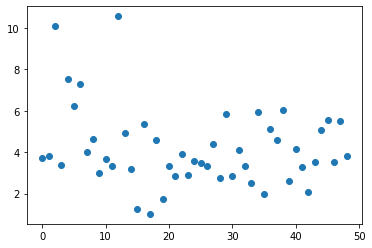

==== SCENE 3 =====


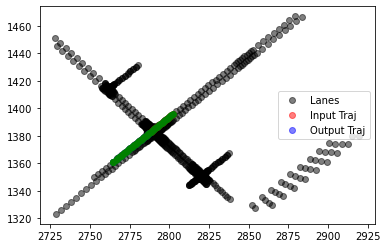

0.11109060482605264
[11.09734188 10.47673322 10.66163986 10.07299617 10.71856235 10.41459076
 11.35224454 11.13061164 10.5892778   9.30722761 11.05341144 10.58162961
 10.25111625 10.79653417 10.47424727 11.04429943 10.6815194  10.38746194
 11.14006741 10.47956005 10.41067844 10.52267277 11.37866885  9.72102023
 11.62069097 10.58909077 10.64323478 10.42967211 10.17976156 10.53163157
 10.65464916 10.98339581 11.19436882 10.81175485 10.94988093  9.46797912
 10.90826651 11.62504892 10.05767399 11.71439817  9.93355831 10.89603494
 10.38123397 11.03339359 11.02099817 11.35250058  9.87199623 22.84762804
  0.        ]
mean: 10.702917448170492
var: 5.617218286561686


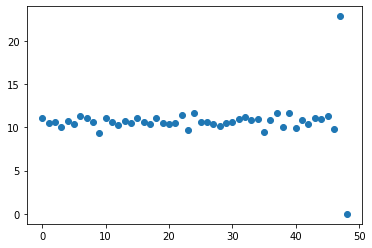

==== SCENE 4 =====


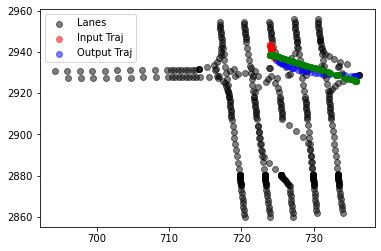

304.68648888182037
[ 0.57875622  6.52791552  2.22582921  1.39763013  4.79650387  2.55018564
  2.37445407  4.58804251  3.86533175  2.24463701  4.99816216  4.13130579
  2.22096851  3.90645005  8.40622728  7.26182888  3.67347271  4.09697715
  5.65475     3.1021054   8.1560291   2.59407655  3.61015588  5.13304613
  8.98712881  5.03206353  3.04556297  7.41926955  0.20671927  5.11510121
  8.05538559  4.57383492  5.16057427  4.00854215  8.47953926  6.17146632
  4.14668471  5.62884231  8.68458132  2.81251355 11.17888465  1.75877486
 12.7435156   8.36744148  4.19812688  1.85806367  0.82918229  0.
  0.        ]
mean: 4.623604911404964
var: 8.127363714009624


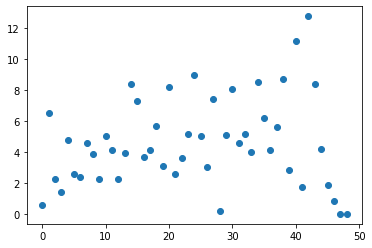

==== SCENE 5 =====


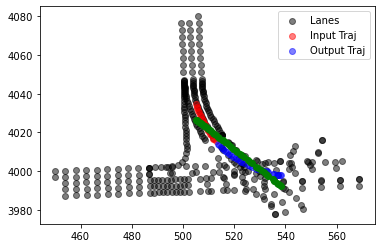

650.3331391108027
[ 5.09572055 14.05913967  7.12559077 14.84744963  7.06395823 14.92249954
  6.76642392 14.40412808  8.7947305  14.22075536  8.27593184 13.05620477
 14.15991401 10.45884839 14.1024962   6.15865522 23.00539613  5.42416263
 12.5082821  15.65768049  5.71811867 17.75042432  6.24076432 14.27046539
  8.69492963 13.67815599  7.98861644 15.34381326 13.25214105  7.29803881
 13.3241781   6.22396781 14.85204419 14.91105666 12.19854373  7.12278179
 19.1794154   6.25740517 13.32121089 12.32064833 11.94812929 10.07671641
  8.64378654 19.34498238  6.01475922 11.39494146  5.56013902  8.12041938
  4.40721292]
mean: 11.133995399890528
var: 18.849251036608546


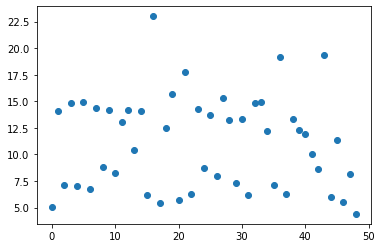

==== SCENE 6 =====


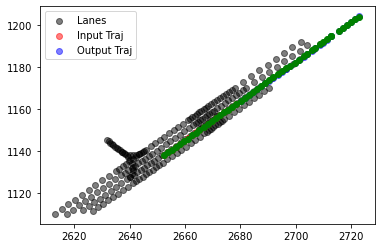

1.08638175223189
[19.47864756 20.24190477 18.94034417 19.85990978 19.47628926 19.77896728
 18.77637019 21.58237737 19.55796526 17.816241   22.13968778 18.99949877
 20.73424508 18.91559979 22.32532989 19.30235898 19.10358962 20.24794243
 20.51369806 20.56067365 20.07046093 19.91424009 20.87217539 20.15091601
 20.1601129  20.41798363 19.7716544  20.58439988 21.39702801 20.0899295
 20.32053847 20.68377911 21.12722058 19.63894749 24.46885164 18.55394477
 22.14355015 19.02764849 21.80820474 15.85803285 20.18562879 23.75377777
  0.         37.49720968 18.52313157 20.89729219 21.86330844 18.46749819
 20.46261659]
mean: 20.144116795043345
var: 16.46983298939496


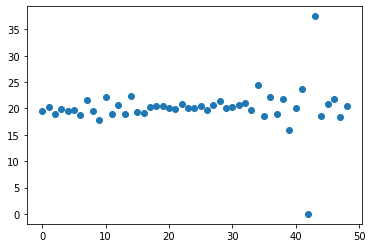

==== SCENE 7 =====


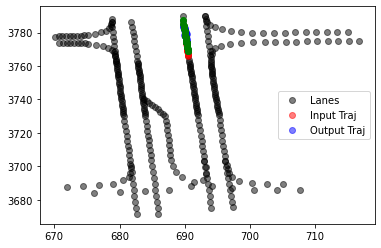

246.25134258192435
[6.522825   5.05569094 5.46471775 5.7795402  4.83719262 5.76566959
 4.56078813 3.77098553 4.77893713 5.27643112 4.58752638 4.12955888
 5.29513381 4.21622148 3.06875792 2.50241044 3.80096325 1.85764853
 3.53950315 4.08243356 8.11263678 2.87292143 3.19966528 3.40507021
 3.84259666 4.6059737  2.1178312  3.64960855 2.4494836  5.12559283
 1.88972346 4.00417583 3.6355225  5.38644604 3.57340157 2.64385021
 2.99241405 4.87209887 4.88388319 1.88234311 0.         6.36455266
 3.496879   3.35989241 3.55760788 4.09609428 3.22451959 3.68859965
 4.16466591]
mean: 3.9998160379059486
var: 1.9371275916404018


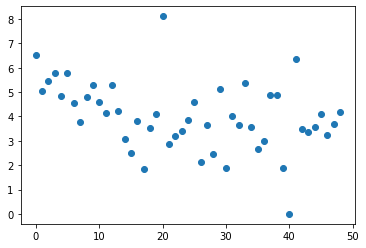

==== SCENE 8 =====


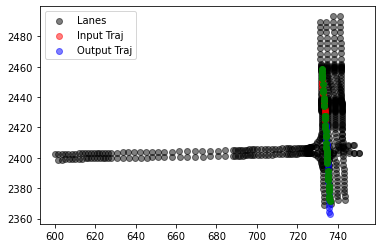

1027.8781770691105
[11.48114067 25.88164854 14.6481957  12.4942929  11.04004382 19.06577675
 15.28149098 13.31030359 12.12480609 30.77839214 11.17166909 13.67358642
 10.53710093 31.05491548 11.01761521  9.39935036 15.33518551 29.41537193
 12.96980066 24.8946917  11.43896428 22.27771783 24.55904112 26.52289238
 12.83507024 25.85364534  8.12497265 30.73144575  5.18969021 19.56302668
 25.60753486  8.37660036 10.22239591 30.84445099 17.31388534 37.80105637
 28.82834364 14.11709506 14.45254276 30.04890344 14.11315459 15.7719066
 26.79403505 28.53499624 14.92196036 27.66861583 14.84475433 26.81410569
 14.16546712]
mean: 18.85538060198326
var: 64.802750743489


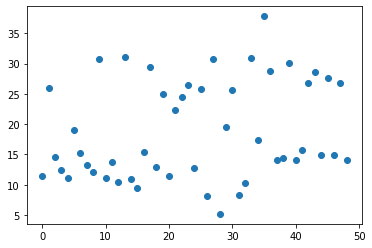

==== SCENE 9 =====


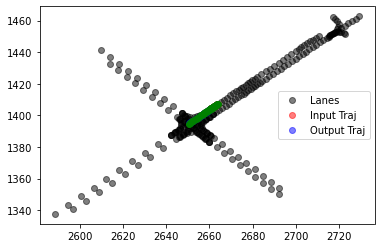

0.35204168162029764
[2.97984343 5.24479658 3.83486288 1.94314913 2.76699365 3.19637059
 3.31989543 3.64034604 2.43961086 2.34443289 2.22885585 0.92853648
 1.16310193 1.61921655 1.45667852 1.81405618 2.66753014 2.09638399
 1.65267623 2.1796118  2.37381391 2.09122403 1.84746814 2.66357151
 3.19474844 3.85785002 4.08878449 5.22387465 1.99767298 7.30750471
 2.98455008 3.98590957 6.6156734  4.14319714 6.59617855 4.1275843
 5.13346835 7.65218986 6.24348672 2.27987013 8.88816441 2.61272012
 7.97540132 6.12117858 5.75839762 6.02843836 5.41391658 5.41292763
 5.77910584]
mean: 3.835016745909424
var: 3.9344904223215966


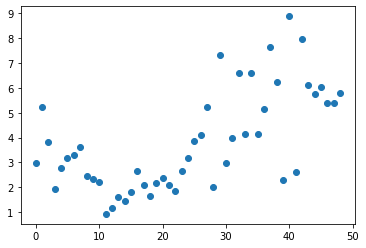

In [46]:
for j in range(len(train_pkl_lst[:10])):

    print(f"==== SCENE {j} =====")
    
    with open(train_pkl_lst[j], 'rb') as f:
        training_sample = pickle.load(f)

    plt.scatter(training_sample['lane'][:,0], training_sample['lane'][:,1], alpha=0.5, label = "Lanes", color = "black")

    for i in range(len(training_sample['track_id'])):
        if training_sample['track_id'][i] == training_sample['agent_id']:
            plt.scatter(training_sample['p_in'][i,:,0], training_sample['p_in'][i,:,1], alpha=0.5, label = "Input Traj", color = "red")
            plt.scatter(training_sample['p_out'][i,:,0], training_sample['p_out'][i,:,1], alpha=0.5, label = "Output Traj", color = "blue")

            plt.legend()
            #plt.show()

    for i in range(len(training_sample['track_id'])): 

        if training_sample['track_id'][i] == training_sample['agent_id']:

            inp = training_sample['p_in'][i]
            out = training_sample['p_out'][i]
            pos = np.concatenate((inp, out), axis=0)

            c = np.polyfit(pos[:, 0], pos[:, 1], deg=1)    
            preds = np.polyval(c, pos[:, 0])
            plt.scatter(pos[:, 0], preds, color="green")
            plt.show()
            #print(pos[:, 1] - preds)
            #print(c)
            #print(preds)
            #print(pos[:, 1])
            np.sum(pos - preds)
            print(np.sum((pos - preds) ** 2))

    for i in range(len(training_sample['track_id'])):

        if training_sample['track_id'][i] == training_sample['agent_id']:

            inp = training_sample['v_in'][i]
            out = training_sample['v_out'][i]
            vel = np.concatenate((inp, out), axis=0)
            #print(vel[:, 0])
            #print(vel[:, 1])
            vtot = np.sqrt(vel[:, 0] ** 2 + vel[:, 1] ** 2)
            print(vtot)
            print(f'mean: {np.mean(vtot)}')
            print(f'var: {np.var(vtot)}')

            plt.scatter(list(range(len(vel))), vtot)
            plt.show()

#training_sample['p_in'].shape
#training_sample['p_out']